In [1]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

np.random.seed(42)
plt.style.use('ggplot')

# **Applying Normal Distribution**

*the likelihood of something occurring is in the middle rather than it’s too high or low..*

## Scenario 1

We assume that Adidas wants to design new sneakers for UK men market, and they have to start new production line exclusively , and they want to know which size is more likely sold so they can be sure they have enough amounts of that size in their stock, therefore  the sales will not be affect the by that..

In [2]:
adidas_data = pd.read_csv('adidas_data.csv')
adidas_data.drop(columns = ['Unnamed: 0'], inplace=True)
adidas_data.head(3)

,sneaker_name,UK_sizes
0,THE ROAD CYCLING SHOES,8.0
1,THE ROAD CYCLING SHOES,7.5
2,THE ROAD CYCLING SHOES,8.5


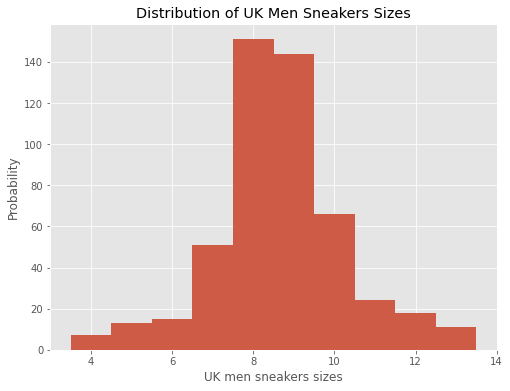

In [3]:
plt.figure(figsize=(8,6))
plt.hist(adidas_data['UK_sizes'], color='#CD5B45')
plt.xlabel('UK men sneakers sizes')
plt.ylabel('Probability')
plt.title('Distribution of UK Men Sneakers Sizes')
plt.show()

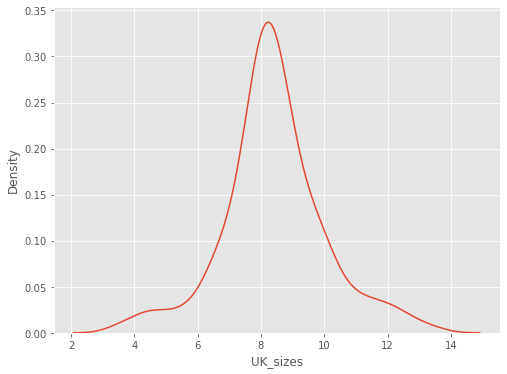

In [4]:
plt.figure(figsize=(8,6))
sns.kdeplot(adidas_data['UK_sizes'])
plt.show()

**Insight**: *UK men sneakers sizes is normally distribution..*

In [5]:
mu = adidas_data['UK_sizes'].mean()
sigma = adidas_data['UK_sizes'].std()
print(f'The estimated mean is : {round(mu, 2)}')
print(f'The estimated standard deviation is : {round(sigma, 2)}')

The estimated mean is : 8.41
The estimated standard deviation is : 1.63


In [6]:
from scipy.stats import norm

def normal_density_func(x, loc, scale):
    """define function that return the probability of density of the data,
    when it has a bell-shaped curve"""
    density = norm.pdf(x, loc, scale)
    return density
def normal_cumulative_left_func(x, loc, scale):
    """function that return the cumulative probability 
    at less than or as maximum - left region of the distribution"""
    cd = norm.cdf(x, loc, scale)
    return cd*100
def normal_cumulative_right_func(x, loc, scale):
    """function that return the cumulative probability 
    at more than or at least - left region of the distribution"""
    cd = 1 - norm.cdf(x, loc, scale)
    return cd*100
def normal_percentile_func(x, loc, scale):
    """function that used to calculate the percentile point given probability."""
    percentile = norm.ppf(x, loc, scale)
    return percentile

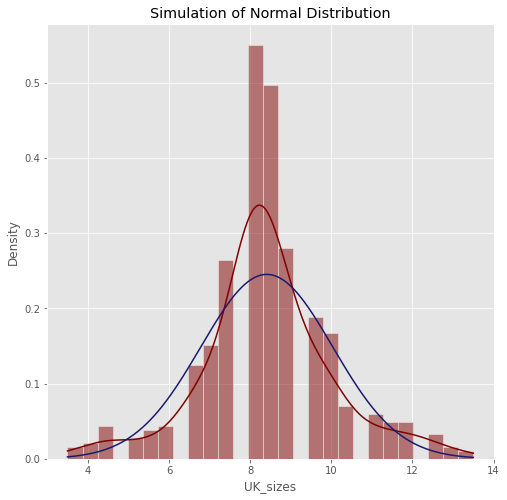

In [7]:
density = pd.DataFrame() 
density['x'] = np.linspace(adidas_data['UK_sizes'].min(), adidas_data['UK_sizes'].max(), 500) 
density['pdf'] = normal_density_func(density['x'], mu, sigma) 
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(adidas_data['UK_sizes'], ax=ax, kde=True, stat='density', color='#800000') 
ax.plot(density['x'], density['pdf'], color='#191970') 
plt.title('Simulation of Normal Distribution') 
plt.show() 

**Insight:**  As we can see in the above plot, there are two curves red and blue. The red curve represents the shape of data distribution and the blue curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

### **The probability of UK men a sneaker size is less than 8**

In [8]:
normal_cumulative_left_func(8, mu, sigma)

40.02607552187196

*There's about 40% chance of UK men a sneaker size is less than 8*

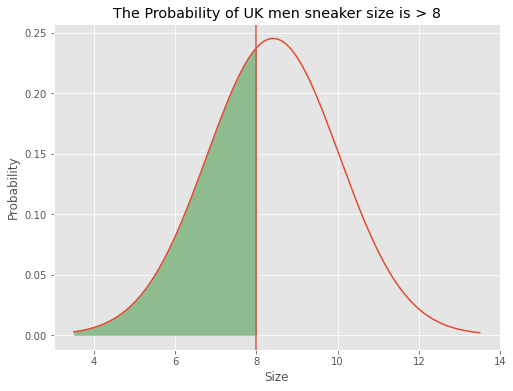

In [9]:
plt.figure(figsize=(8,6))
plt.plot(density['x'], density['pdf']) 
plt.axvline(x=8, c='#CD5B45') 
x1 = np.linspace(density['x'].min(), 8, 500) 
plt.fill_between(x1, normal_density_func(x1, mu, sigma), color='#8FBC8F') 
plt.xlabel('Size') 
plt.ylabel('Probability') 
plt.title('The Probability of UK men sneaker size is > 8') 
plt.show()

### **The probability of UK men a sneaker size is more than 13**

In [10]:
normal_cumulative_right_func(13, mu, sigma)

0.23922244734826403

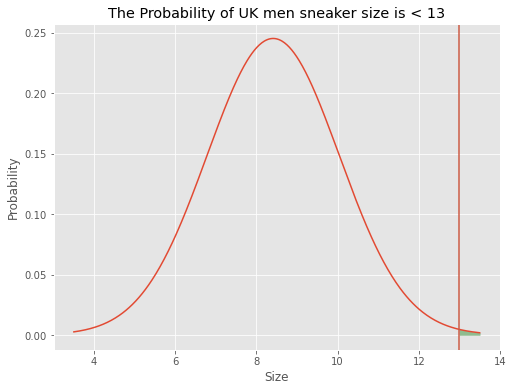

In [11]:
plt.figure(figsize=(8,6))
plt.plot(density['x'], density['pdf']) 
plt.axvline(x=13, c='#CD5B45') 
x1 = np.linspace(density['x'].max(), 13, 500) 
plt.fill_between(x1, normal_density_func(x1, mu, sigma), color='#8FBC8F') 
plt.xlabel('Size') 
plt.ylabel('Probability') 
plt.title('The Probability of UK men sneaker size is < 13') 
plt.show()

### **The sneaker size that in the 50th percentile**

In [12]:
normal_percentile_func(0.5, mu,sigma)

8.411

*Since the shape of our data is normal we can say that : a large propotion of UK men wear the 8.4 size, or in the average the UK males wearing this size...*

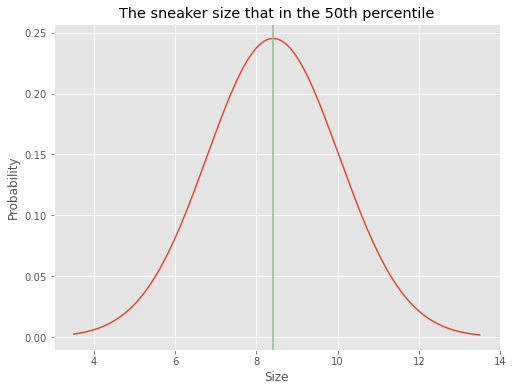

In [13]:
plt.figure(figsize=(8,6))
plt.plot(density['x'], density['pdf'])
plt.axvline(x=normal_percentile_func(0.5, mu,sigma), c='#8FBC8F')
plt.xlabel('Size')
plt.ylabel('Probability')
plt.title('The sneaker size that in the 50th percentile')
plt.show()

### **The minimum sneaker size that someone like a basketball player will shop**

In [14]:
normal_percentile_func(0.95, mu,sigma)

11.086540742541924

*So, if the basketball player decide to shop from any Adidas store they will at least take a 11 size..*

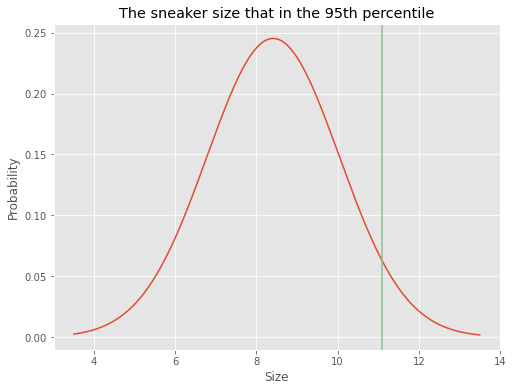

In [15]:
plt.figure(figsize=(8,6))
plt.plot(density['x'], density['pdf'])
plt.axvline(x=normal_percentile_func(0.95, mu,sigma), c='#8FBC8F')
plt.xlabel('Size')
plt.ylabel('Probability')
plt.title('The sneaker size that in the 95th percentile')
plt.show()

# **Applying Standardization of Normal Variables**

## Scenario 2


- Adidas decides reward the best top customer around the world, so they did primitive analysis and found out that the top sales countries are rank1:Japan and then rank 2: Australia so, in order to decide between these two countries they chose the top customer at each countries,  the top japanese customer : spent 51662 JPY , and the top australian customer : spent 1078 AUD , what Adidas wants to know is which customer is acutly spend the most on Adidas products, so they can reward him/her..

- Suppose we know that the Japan customers spendings are normally distributed with a mean of 38266 and a standard deviation of 7654 and Australia customers spendings are normally distributed with a mean of 798 and a standard deviation of 199..

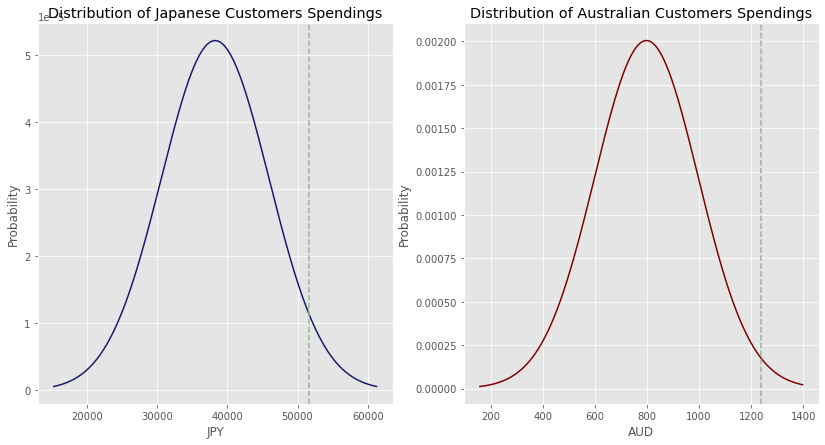

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,7))
x = np.linspace(15307, 61229, 1000)
ax1.plot(x, norm.pdf(x, loc = 38268, scale = 7654), color = '#191970')
ax1.set_title('Distribution of Japanese Customers Spendings')
ax1.set_xlabel('JPY')
ax1.set_ylabel('Probability')
ax1.axvline(51662, linestyle = '--', color = '#8FBC8F')
x1 = np.linspace(159, 1397, 1000)
ax2.plot(x1, norm.pdf(x1, loc = 798 , scale = 199), color = '#800000') 
ax2.set_title('Distribution of Australian Customers Spendings')
ax2.set_xlabel('AUD')
ax2.set_ylabel('Probability')
ax2.axvline(1238, linestyle = '--', color = '#8FBC8F')
plt.show()

In [17]:
def Zscore_func(x, mu, sigma):
    z_score = (x-mu)/sigma
    return round(z_score, 2)

In [18]:
zscore_of_top_janpanese_customer = Zscore_func(51662, 38268, 7654)
zscore_of_top_janpanese_customer

1.75

In [19]:
zscore_of_top_australian_customer = Zscore_func(1238, 798, 199)
zscore_of_top_australian_customer

2.21

*The top janpanese customer who spent 51662 JPY is **1.75** standard deviation above the AVG, while the top australian customer who spent 1238 AUD is **2.21** standard deviation above the AVG..*

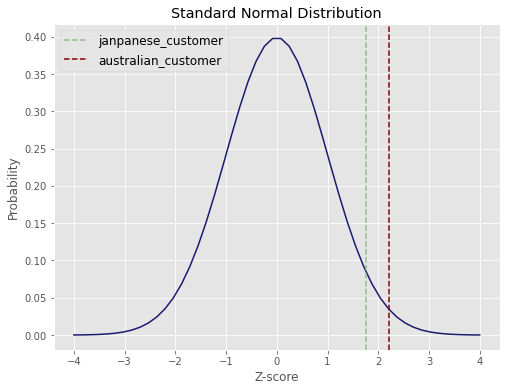

In [20]:
fig, ax = plt.subplots(figsize = (8,6))
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = '#191970')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-score')
ax.set_ylabel('Probability')
ax.axvline(zscore_of_top_janpanese_customer,  linestyle = '--', color = '#8FBC8F', label='janpanese_customer')
ax.axvline(zscore_of_top_australian_customer, linestyle = '--', color = '#800000', label='australian_customer')
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Summary** 

Before we find out customers' z-score statistics, both of these customers were not comparable in term of who spending the most since they use different currencies depend on the country they based at , but now with their z-scores results, we can say that: in terms of the spendings : an Australian customer has a higher z-score so he/she is the 1st customer of Adids ..